In [300]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

## IRIS Dataset

In [189]:
%reset
import pandas as pd
import numpy as np

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [190]:
col_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Label']
irisdf = pd.read_csv("iris.csv", names = col_names)
irisdf['Label'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [191]:
irisdf.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [193]:
#encoding the labels

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
irisdf['Label_code'] = label_encoder.fit_transform(irisdf['Label'])
irisdf['Label_code'].unique()

array([0, 1, 2], dtype=int64)

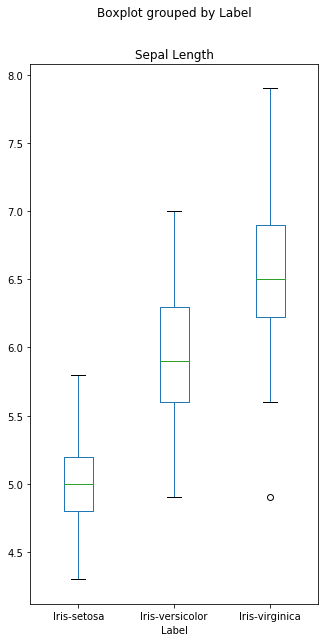

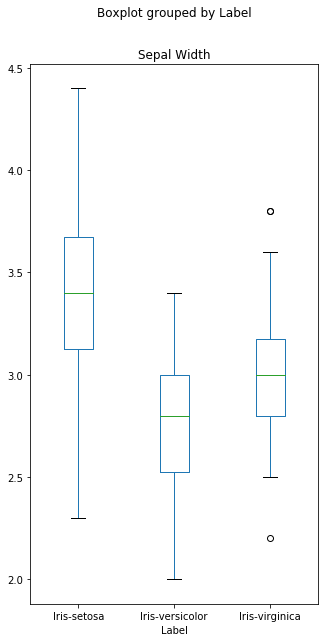

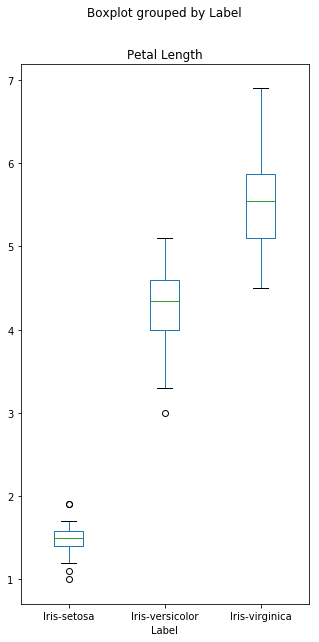

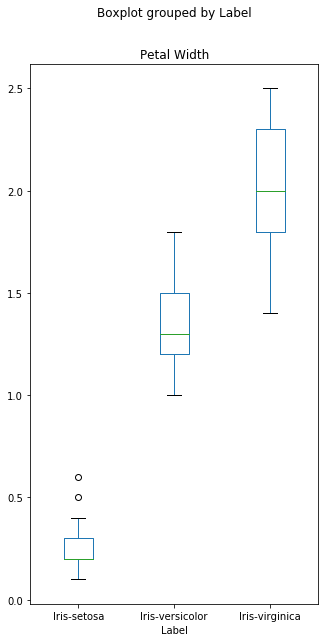

In [195]:
import matplotlib.pyplot as plt

irisdf.boxplot(column=['Sepal Length'],grid=False, by= 'Label', figsize = (5,10))
irisdf.boxplot(column=['Sepal Width'], by= 'Label',grid=False,  figsize = (5,10))
irisdf.boxplot(column=['Petal Length'], by= 'Label', grid=False, figsize = (5,10))
irisdf.boxplot(column=['Petal Width'], by= 'Label',grid=False,  figsize = (5,10));
    

For the species, Iris virginica - there are outliers for the variables Sepal Length and Sepal Width, but not for Petal Length and Petal Width.

For the species, Iris versicolor - there is outliers only for the variable Petal Length, but the other variables doesn't have any outliers.

For the species, Iris setosa - there are outliers for the petal attributes, Petal Length and Petal width but no outliers for the sepal attributes. The petal attributes are way lesser in this species than the other 2 species. 

In [218]:
#Split into test and train

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(irisdf, test_size=0.2, random_state = 4)

In [219]:
X_test.reset_index(inplace=True, drop=True)
X_test

,Sepal Length,Sepal Width,Petal Length,Petal Width,Label,Label_code
0,6.4,2.8,5.6,2.1,Iris-virginica,2
1,5.7,3.8,1.7,0.3,Iris-setosa,0
2,7.4,2.8,6.1,1.9,Iris-virginica,2
3,7.6,3.0,6.6,2.1,Iris-virginica,2
4,7.3,2.9,6.3,1.8,Iris-virginica,2
5,6.0,2.9,4.5,1.5,Iris-versicolor,1
6,6.0,2.7,5.1,1.6,Iris-versicolor,1
7,5.8,4.0,1.2,0.2,Iris-setosa,0
8,5.4,3.9,1.7,0.4,Iris-setosa,0
9,6.3,2.8,5.1,1.5,Iris-virginica,2


In [255]:
X_test.groupby('Label_code').Label_code.count().idxmax()

0

In [260]:
from sklearn.metrics import accuracy_score
from collections import Counter

def predict(X_train, test, k):

    distances = []
    target = []
    dist = 0
    X_train['distance'] = 0 
    for i in [0,1]:
        X_train['distance'] += (X_train.iloc[:,i] - test[i])**2
    X_train['distance'] = X_train['distance']**(0.5)
    class_pred = X_train.nsmallest(k, 'distance')
    aq = class_pred.groupby('Label_code').Label_code.count().idxmax()
    return aq

def nearest_neighbor(X_train, X_test, k):
    
    prediction = []
    for i in range(len(X_test)):
        prediction.append(predict(X_train, X_test.iloc[i], k))
    X_test['predictions'] = prediction
    return accuracy_score( X_test.Label_code, X_test.predictions, normalize=True)

def decision_boundary(e, k):
    X_train['dist'] = (X_train['Sepal Length'] - e[0])**2  + (X_train['Sepal Width'] - e[1])**2
    X_train['dist'] = X_train.dist.apply(np.sqrt)
    return X_train.nsmallest(k, 'dist').groupby('Label_code').Label_code.count().idxmax()


In [269]:
from matplotlib.colors import ListedColormap
test_pred = []
accuracy = []
cmap_light=ListedColormap(['#FBBBB9','#5EFB6E','#82CAFF'])
cmap_bold=ListedColormap(['#CA226B','#387C44','#2B65EC'])

Accuracy score: 0.866667
3.8
8.4


<Figure size 432x288 with 0 Axes>

(3.8, 8.300000000000004)

(1.7000000000000002, 4.8000000000000025)

Text(0.5, 1.0, 'Decision boundary when k = 1')

Text(0.5, 0, 'Sepal Length')

Text(0, 0.5, 'Sepal Width')

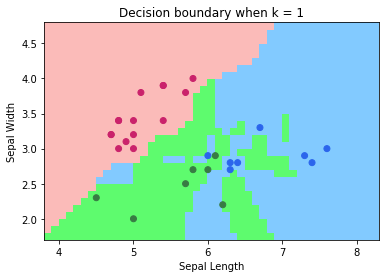

Accuracy score: 0.866667
3.8
8.4


<Figure size 432x288 with 0 Axes>

(3.8, 8.300000000000004)

(1.7000000000000002, 4.8000000000000025)

Text(0.5, 1.0, 'Decision boundary when k = 2')

Text(0.5, 0, 'Sepal Length')

Text(0, 0.5, 'Sepal Width')

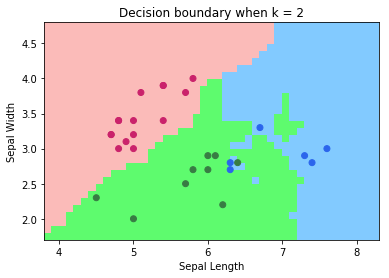

Accuracy score: 0.833333
3.8
8.4


<Figure size 432x288 with 0 Axes>

(3.8, 8.300000000000004)

(1.7000000000000002, 4.8000000000000025)

Text(0.5, 1.0, 'Decision boundary when k = 4')

Text(0.5, 0, 'Sepal Length')

Text(0, 0.5, 'Sepal Width')

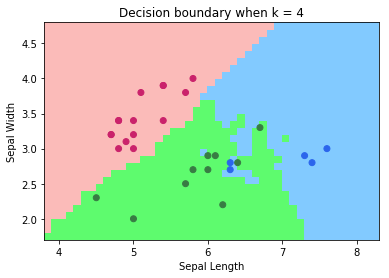

Accuracy score: 0.900000
3.8
8.4


<Figure size 432x288 with 0 Axes>

(3.8, 8.300000000000004)

(1.7000000000000002, 4.8000000000000025)

Text(0.5, 1.0, 'Decision boundary when k = 6')

Text(0.5, 0, 'Sepal Length')

Text(0, 0.5, 'Sepal Width')

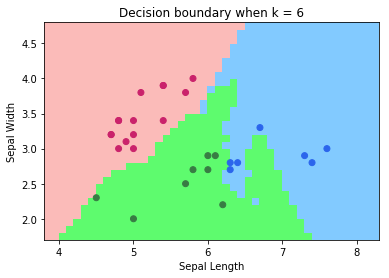

Accuracy score: 0.833333
3.8
8.4


<Figure size 432x288 with 0 Axes>

(3.8, 8.300000000000004)

(1.7000000000000002, 4.8000000000000025)

Text(0.5, 1.0, 'Decision boundary when k = 10')

Text(0.5, 0, 'Sepal Length')

Text(0, 0.5, 'Sepal Width')

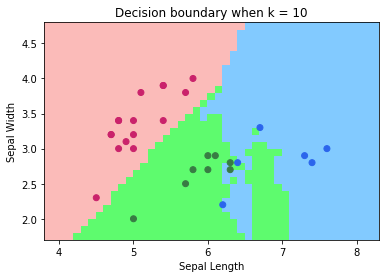

Accuracy score: 0.866667
3.8
8.4


<Figure size 432x288 with 0 Axes>

(3.8, 8.300000000000004)

(1.7000000000000002, 4.8000000000000025)

Text(0.5, 1.0, 'Decision boundary when k = 15')

Text(0.5, 0, 'Sepal Length')

Text(0, 0.5, 'Sepal Width')

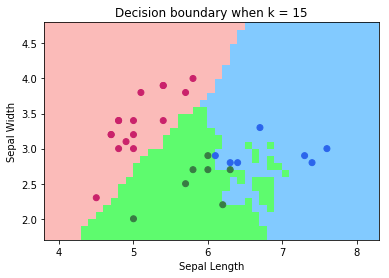

In [301]:
accuracy = []
for k in [1,2, 4,6,10,15]:
    predictions =nearest_neighbor(X_train, X_test, k)    
    accuracy.append(predictions)
    print("Accuracy score: %f"%(accuracy_score( X_test.Label_code, X_test.predictions, normalize=True)))

    x_min, x_max = X_train['Sepal Length'].min()-0.5, X_train['Sepal Length'].max()+0.5
    y_min, y_max = X_train['Sepal Width'].min()-0.5, X_train['Sepal Width'].max()+0.5
    
    print(x_min)
    print(x_max)
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))    
    Z = np.array([decision_boundary(e, k) for e in zip(xx.ravel(),yy.ravel())])    
    Z= Z.reshape(xx.shape)
    

    X_test['color'] = X_test.predictions.apply(lambda x : ['#CA226B','#387C44','#2B65EC'][x])
    plt.figure()
    plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
    plt.scatter(X_test['Sepal Length'],X_test['Sepal Width'],   c= X_test.color )
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.title('Decision boundary when k = '+ str(k))
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width");
    plt.show();

There is variation in values of accuracy with variation in k. Accuracy increases with certain values of k while decreases for certain others. The maximum value of accuracy is obtained at k = 6 which is 0.900 (90%).
Also, the decision boundary becomes more well formed and clear when the value of k increases.

## MNIST Data

In [54]:
traindf = pd.read_csv('mnist_train.csv', header = None)
testdf = pd.read_csv('mnist_test.csv', header = None, nrows = 1000)

In [55]:
traindf.rename(columns = {0: 'Value'}, inplace = True)
testdf.rename(columns = {0: 'Value'}, inplace = True)
traindf


,Value,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
traindata = traindf.iloc[:,1:].values
trainlabels = traindf.iloc[:,0].values

testdata = testdf.iloc[:,1:].values
testlabels = testdf.iloc[:,0].values

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
#KNN model

model = KNeighborsClassifier(n_neighbors = 2)

In [75]:
predictions = []
error_score = []
for i in [500, 1000, 2500, 5000, 10000, 30000, 60000]:
    model.fit(traindata[:i], trainlabels[:i])
    pred = model.predict(testdata)
    predictions.append(pred)
    error_score.append(1-accuracy_score(testlabels, pred))

In [79]:
error_score

[0.22599999999999998,
 0.18300000000000005,
 0.13,
 0.10499999999999998,
 0.09299999999999997,
 0.05800000000000005,
 0.052000000000000046]

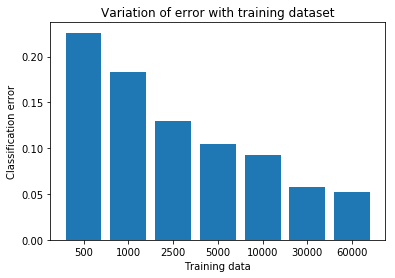

In [82]:
train_list = ['500', '1000', '2500', '5000', '10000', '30000', '60000']

plt.bar(train_list, error_score)
plt.xlabel('Training data')
plt.ylabel('Classification error')
plt.title('Variation of error with training dataset')
plt.show;

There is decrease in classification error with increase in number of training datapoints which is translated as an accuracy increase of model with respect to increase in training data. This reinstates the fact that KNN algorithm needs as many datapoints to train on. It is a lazy algorithm and took a lot of time to train and predict when the algorithm was designed from scratch.

In [87]:
#Classification report for the best test- which is the last one with minimum error score

print(classification_report(testlabels, predictions[6]))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96        85
           1       0.97      1.00      0.98       126
           2       0.97      0.93      0.95       116
           3       0.90      0.94      0.92       107
           4       0.93      0.95      0.94       110
           5       0.94      0.95      0.95        87
           6       0.99      0.97      0.98        87
           7       0.93      0.95      0.94        99
           8       0.99      0.83      0.90        89
           9       0.96      0.94      0.95        94

   micro avg       0.95      0.95      0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



In [88]:
#confusion matrix for the best test - 6

print(confusion_matrix(testlabels,predictions[6]))

[[ 85   0   0   0   0   0   0   0   0   0]
 [  0 126   0   0   0   0   0   0   0   0]
 [  3   1 108   0   1   0   0   3   0   0]
 [  0   0   1 101   0   3   0   2   0   0]
 [  1   1   0   0 105   0   0   0   0   3]
 [  0   0   0   3   1  83   0   0   0   0]
 [  2   0   0   0   1   0  84   0   0   0]
 [  0   2   0   2   1   0   0  94   0   0]
 [  2   0   2   5   2   2   1   0  74   1]
 [  0   0   0   1   2   0   0   2   1  88]]


In [90]:
#q3

model_new = KNeighborsClassifier(n_neighbors = 2, weights = 'distance')
fit = model_new.fit(traindata[:30000], trainlabels[:30000])
predict = model_new.predict(testdata)
error_new = 1 - accuracy_score(testlabels, predict)

In [91]:
error_new

0.05500000000000005

There is decrease in error value when half of the training dataset was used under the condition where the weights used the 'distance' measure. This measure enables closer neighbors to have greater influence than neighbors that are far away. 